In [61]:
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import pickle

In [3]:
female_path = glob('../data/faces/female/*.png')
male_path = glob('../data/faces/male/*.png')
path = female_path + male_path

In [4]:
def getSize(path):
    img = Image.open(path)
    return img.size[0]


In [5]:
df = pd.DataFrame(data=path, columns=['path'])
df['size'] = df['path'].apply(getSize)
df.info

<bound method DataFrame.info of                              path  size
0    ../data/faces/female/412.png   150
1    ../data/faces/female/360.png   140
2    ../data/faces/female/638.png   164
3    ../data/faces/female/610.png   141
4    ../data/faces/female/604.png   137
..                            ...   ...
929    ../data/faces/male/153.png   142
930    ../data/faces/male/423.png   156
931    ../data/faces/male/345.png   124
932    ../data/faces/male/351.png   193
933    ../data/faces/male/437.png   105

[934 rows x 2 columns]>

In [6]:
df.describe()

,size
count,934.000000
mean,114.789079
std,34.763840
min,35.000000
25%,92.000000
50%,114.000000
75%,138.000000
max,214.000000


<AxesSubplot:>

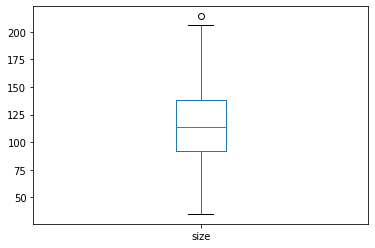

In [7]:
df['size'].plot(kind='box')

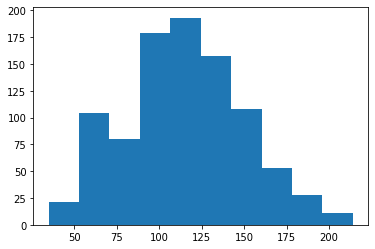

In [8]:
plt.hist(df['size'], bins=10);

In [9]:
def gender(string):
    try:
        return string.split('/')[-2]
    except:
        return None

In [10]:
df['gender'] = df['path'].apply(gender)
df['gender'].value_counts()

male      526
female    408
Name: gender, dtype: int64

In [54]:
def resize_img(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    size = gray.shape[0]
    if size >= 80: # shrink
        gray_resize = cv2.resize(gray, (80,80), cv2.INTER_AREA)
    else: # enlarge
        gray_resize = cv2.resize(gray, (80,80), cv2.INTER_CUBIC)
    
    return gray_resize.flatten()

In [55]:
df['image'] = df['path'].apply(resize_img)

In [56]:
df.head()

,path,size,gender,image
0,../data/faces/female/412.png,150,female,"[235, 230, 229, 228, 228, 230, 218, 185, 177, ..."
1,../data/faces/female/360.png,140,female,"[125, 120, 150, 181, 175, 139, 109, 112, 130, ..."
2,../data/faces/female/638.png,164,female,"[55, 35, 31, 34, 35, 33, 31, 31, 31, 31, 28, 2..."
3,../data/faces/female/610.png,141,female,"[40, 42, 48, 46, 43, 44, 46, 43, 40, 25, 7, 2,..."
4,../data/faces/female/604.png,137,female,"[44, 52, 59, 61, 63, 62, 59, 57, 55, 56, 62, 7..."


In [57]:
df_img = df['image'].apply(pd.Series)

In [58]:
df_data = pd.concat((df['gender'], df_img), axis=1)

In [59]:
df_data.head()

,gender,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,female,235,230,229,228,228,230,218,185,177,...,83,84,86,102,114,99,113,120,133,136
1,female,125,120,150,181,175,139,109,112,130,...,112,112,116,122,121,126,123,115,109,107
2,female,55,35,31,34,35,33,31,31,31,...,25,29,25,30,29,22,50,130,166,175
3,female,40,42,48,46,43,44,46,43,40,...,2,3,6,11,14,15,14,12,14,11
4,female,44,52,59,61,63,62,59,57,55,...,32,32,34,39,48,56,61,65,69,69


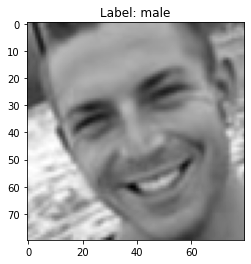

In [60]:
plt.imshow(df_data.loc[501][1:].values.reshape(80,80).astype('int'), cmap='gray');
plt.title("Label: " + df_data.loc[501]['gender'])
plt.show()

In [62]:
pickle.dump(df_data, open('../data/df_80x80.pickle', 'wb'))